# Maze generator

A random generator of maze.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse

In [2]:
from utils import display_maze

In [3]:
def random_maze(width = 10, height = 10,complexity=.8, density=.8):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    M = np.ones(shape,int)
    # Fill borders
    M[0, :] = M[-1, :] = 0
    M[:, 0] = M[:, -1] = 0
    # Fill inside
    for d in range(density):
        x, y = np.random.randint(0, shape[0] // 2) * 2, np.random.randint(0, shape[1] // 2) * 2
        M[x, y] = 0
        for c in range(complexity):
            neighbors = []
            if x > 1:             neighbors.append((x - 2,y))
            if x < shape[0] - 2:  neighbors.append((x + 2,y))
            if y > 1:             neighbors.append((x,y - 2))
            if y < shape[1] - 2:  neighbors.append((x,y + 2))
            if len(neighbors):
                x_,y_ = neighbors[np.random.choice(len(neighbors))]
                if M[x_,y_] == 1:
                    M[x_, y_] = 0
                    M[x_ + (x - x_) // 2,y_ + (y - y_) // 2] = 0
                    x, y = x_, y_
    # Select start and end
    x_free = list(np.where(M == 1)[0])
    y_free = list(np.where(M == 1)[1])
    i = np.random.choice(range(len(x_free)))
    start = (x_free.pop(i),y_free.pop(i))
    i = np.random.choice(range(len(x_free)))
    end = (x_free.pop(i),y_free.pop(i))
    return M,start,end

In [4]:
M, start, end = random_maze(20,20)

In [5]:
maze = sparse.csr_matrix(M)

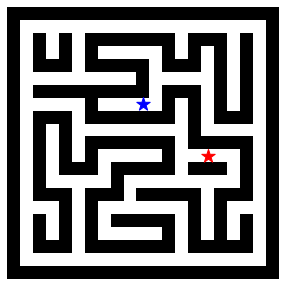

In [6]:
display_maze(maze, states_target=[start, end])